In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

In [3]:
plt.style.use('dark_background')

In [4]:
df_train = pd.read_csv('./files/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.shape

(1460, 81)

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h3>Analyzing target values</h3>

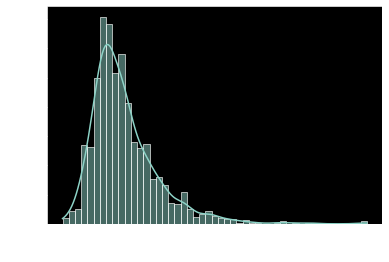

In [7]:
sns.histplot(x=df_train['SalePrice'], kde=True)
plt.show()

In [8]:
print("Skrewness %f" %df_train['SalePrice'].skew())
print('Kurtosis %f' %df_train['SalePrice'].kurt())
# the ideal skrewdness in 0(-3 to 3) and ideal kurtosis value in 3(-10 to 10)

Skrewness 1.882876
Kurtosis 6.536282


In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
# with open('./files/data_description.txt') as file:
#     details = []
#     count = 0
#     for line in file.readlines():
#         if ':' in line:
#             line_split = line.split(':')
#             column_name = line_split[0].strip()
   
#             if '.5' in column_name:
#                 continue
                
#             column_detail = line.split(':')[1].strip()
            


#             details.append([column_name, column_detail])


In [11]:
# details = np.array(details)
# details_cols = set(details[:, 0])
# train_cols = set(df_train.columns)

In [12]:
# print(f'Columns we are missing in details columns {train_cols.difference(details_cols)}')

In [13]:
# print(f'Columns we are missing in details columns {details_cols.difference(train_cols)}')

In [14]:
# removing Bedroom and Kitchen
# details = details[(details[:, 0] != 'Bedroom') & (details[:, 0] != 'Kitchen')]

In [15]:
# mannualy adding rows to details after saving it

In [16]:
# pd.DataFrame(details, columns=['Columns', 'Description']).to_csv('./files/Expectation.csv', 
#                                                                  index=False)

<h3>Feature Selection</h3>

<p>After using the our sixth sense and help of excel Exceptation spreadsheet we were able to find some features which may have a great impact on saleprice but lets see if our thinking is correct</p>

<p>Dividing the categorical and continuous values into seperate dataset</p>

In [17]:
cat_cols = ["MSSubClass", 
"MSZoning", 
"Utilities",
"BldgType",
"HouseStyle",
"OverallQual",
"OverallCond",
"GarageType",
'Neighborhood'
]

con_cols = ["YearBuilt",
"1stFlrSF",
"GrLivArea",
"GarageArea",
'GarageCars'
]

In [18]:
cat_df = df_train[cat_cols]
con_df = df_train[con_cols]

cat_df.head()

,MSSubClass,MSZoning,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,GarageType,Neighborhood
0,60,RL,AllPub,1Fam,2Story,7,5,Attchd,CollgCr
1,20,RL,AllPub,1Fam,1Story,6,8,Attchd,Veenker
2,60,RL,AllPub,1Fam,2Story,7,5,Attchd,CollgCr
3,70,RL,AllPub,1Fam,2Story,7,5,Detchd,Crawfor
4,60,RL,AllPub,1Fam,2Story,8,5,Attchd,NoRidge


In [19]:
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


<p>First lets analyse the continous data with SalePrice</p>

In [20]:
con_df.head(2)

,YearBuilt,1stFlrSF,GrLivArea,GarageArea,GarageCars
0,2003,856,1710,548,2
1,1976,1262,1262,460,2


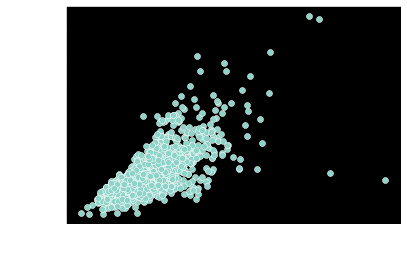

In [21]:
price = df_train['SalePrice']
var = con_df['GrLivArea']

sns.scatterplot(x=var, y=price)
plt.show()

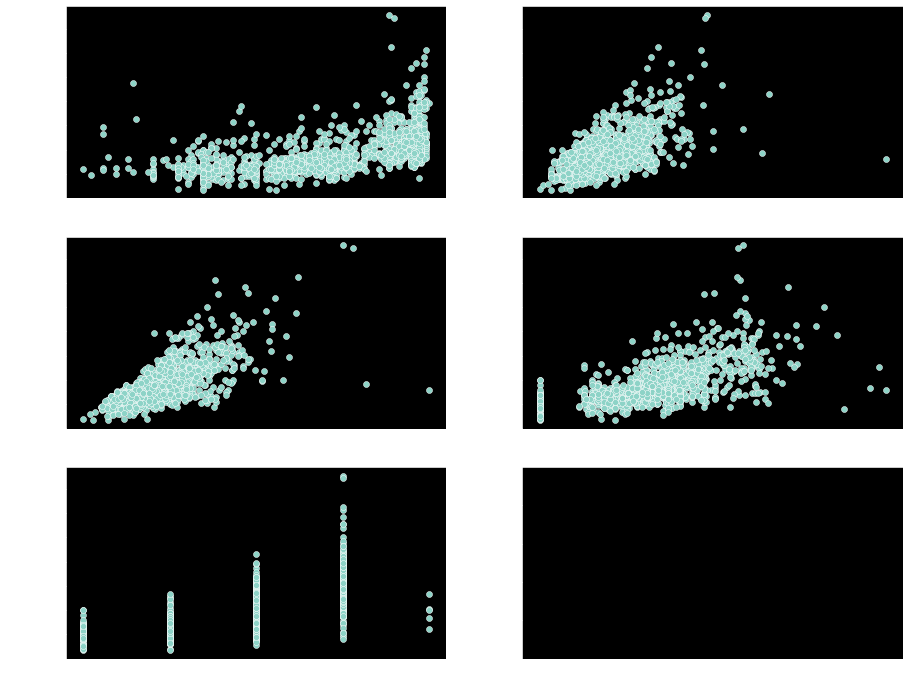

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

row = 0
col = 0
for index, var in enumerate(con_cols):
    sns.scatterplot(x=var, y=price, data=con_df, ax=ax[row, col])
    
    col += 1
    if col == 2:
        row += 1 
    if col >= 2:
        col = 0


<h4>here although th GarageCars and SalePrice looks weird. GarageCars is  continous variables as the more number of cars that can be placed in garage is how much the sale price would be and the number of cars that can stored in garage is not finite and it can beany number of value(like 80) although in real life there is limitation</h4>

In [23]:
con_df[con_df['GarageCars'] == 4].shape

(5, 5)

<p>It seems that although garage cars have upward tendency it seems that for some reason it suddenly goes downwards. Although the number of such occurences is very low which means it is a outlayer</p>

<p>Lets analysize the categorical values</p>

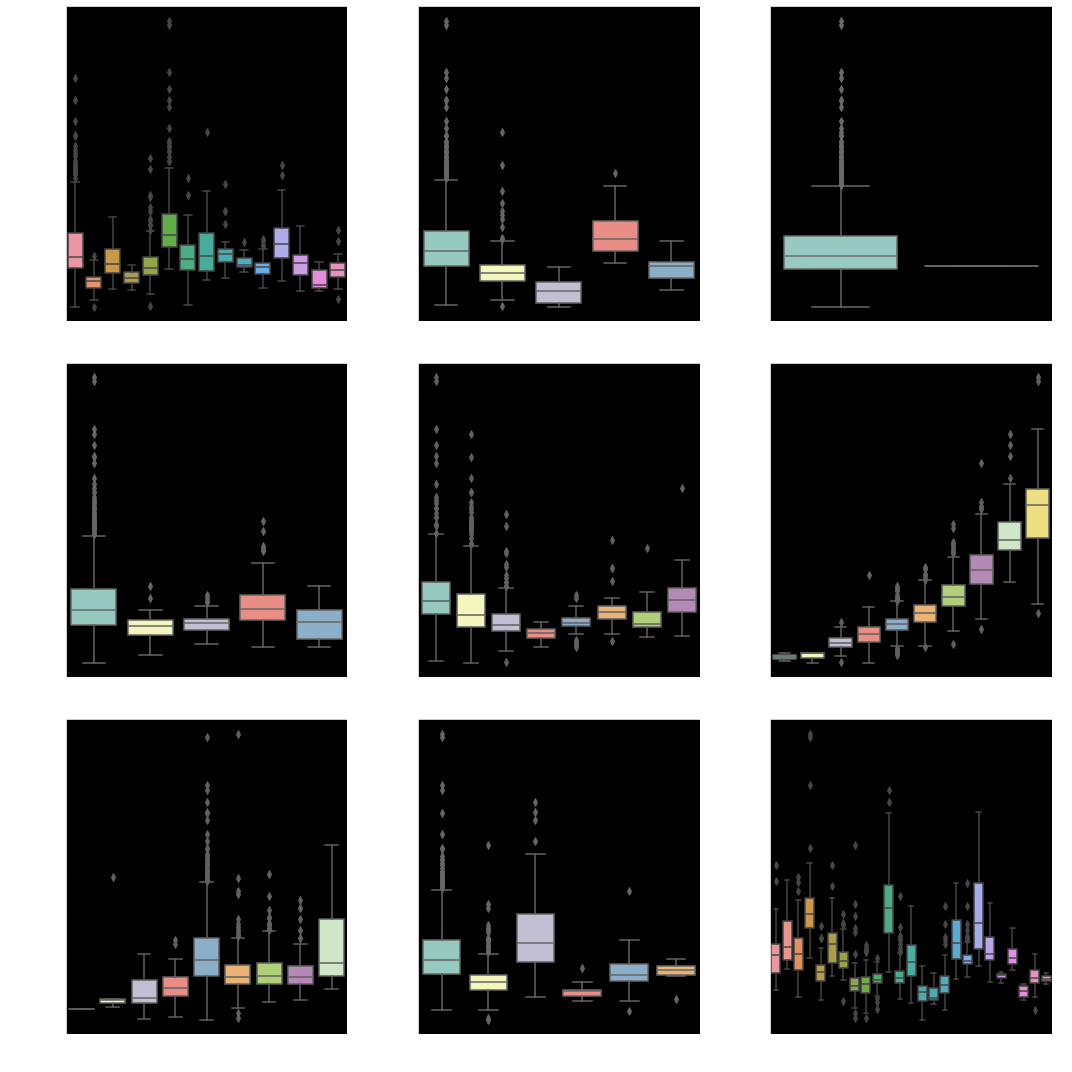

In [24]:
plt.figure(figsize=(15, 15))
for index, var in enumerate(cat_cols):
    plt.subplot(3, 3, index+1)
    sns.boxplot(x=var, y=price, data=cat_df)
        
plt.tight_layout()
plt.show()

In [25]:
cat_df['MSSubClass'].corr(price)

# the coroleation between MS Subclass and price is very low because MSSubclass is just random values
# with out any meaning

-0.08428413512659523

<h4>In the categorical dataset in MSSubclass although the values are number they do not mean anything like a better number does not mean that the house is good. The number only represents a category like 20 means 1-STORY 1946 & NEWER ALL STYLE. So this value is categorical which can be said by looking at the plot and it's corroleation cand we need one hot encode this feature</h4>
<h4>But OverllQual and OverallCond has number it is somwhere between categorical and contious variable. It has a finite set of nubmer which represents categorcial feature but unlike MSSubClass it has a meaning as a better score generally means more sale price which is the same characteristics as continous feature. So we did not need to one hot encode it</h4>

<p>All the analysis we did right now is based on intuation. But lets take a more logical process</p>

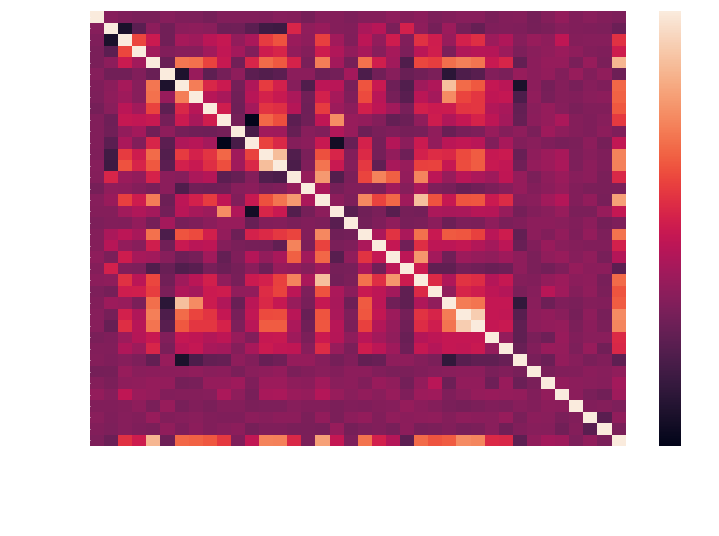

In [26]:
corr_mat = df_train.corr()
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr_mat, vmax=None, ax=ax)
plt.show()

In [27]:
corr_mat.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [28]:
corr_mat.sort_values(by='SalePrice', ascending=False)[:12].head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [29]:
k = 10
corr_mat.nlargest(k, 'SalePrice').head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [30]:
corr_cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
corr_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [31]:
# high_corr = np.corrcoef(df_train[corr_cols].values.T)
high_corr = df_train[corr_cols].corr()

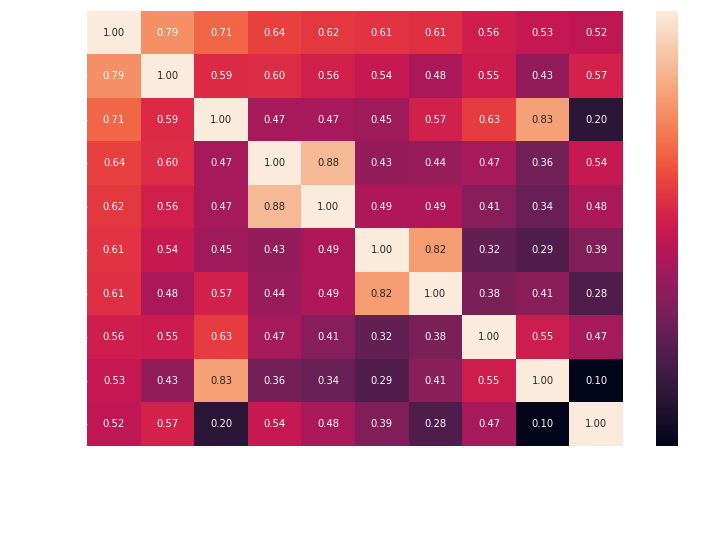

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(high_corr, cbar=True, annot=True, fmt='.2f', ax=ax,
            xticklabels=corr_cols, yticklabels=corr_cols)
plt.show()

In [33]:
df_train['YearBuilt'].corr(df_train['GarageYrBlt'])

0.825667484174342

<p>As you can see from the heatmap that there are a lot of <b>Multicollinearity</b>  which would drag may drag our model(a corr greater than 0.7 between independet variables are called Multicollinearity  here dependent variable in SalePrice). Here GarageYrBuilt(independent) and YearBuilt(independent) is Multicollinear because here because most of the time the year garage was built is same as the year the house was build. So we only need to take one feature from here since YearBuilt has much more correlation than garage we will keep it and remove GarageYrblt. It is the same for (GrLivArea, TotalRmsAbvGrd), (GarageCars, GarageArea), (TotalBsmtSf, 1stFloor) if k=15</p>

In [34]:
# not taking MaVnrArea for simplification and BSmtfinSF1 does not seem important
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','FullBath', 
       'YearBuilt']

# of k = 15 

In [35]:
df_train = df_train.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt'], axis=1)
df_train.shape

(1460, 77)

<Figure size 1080x1440 with 0 Axes>

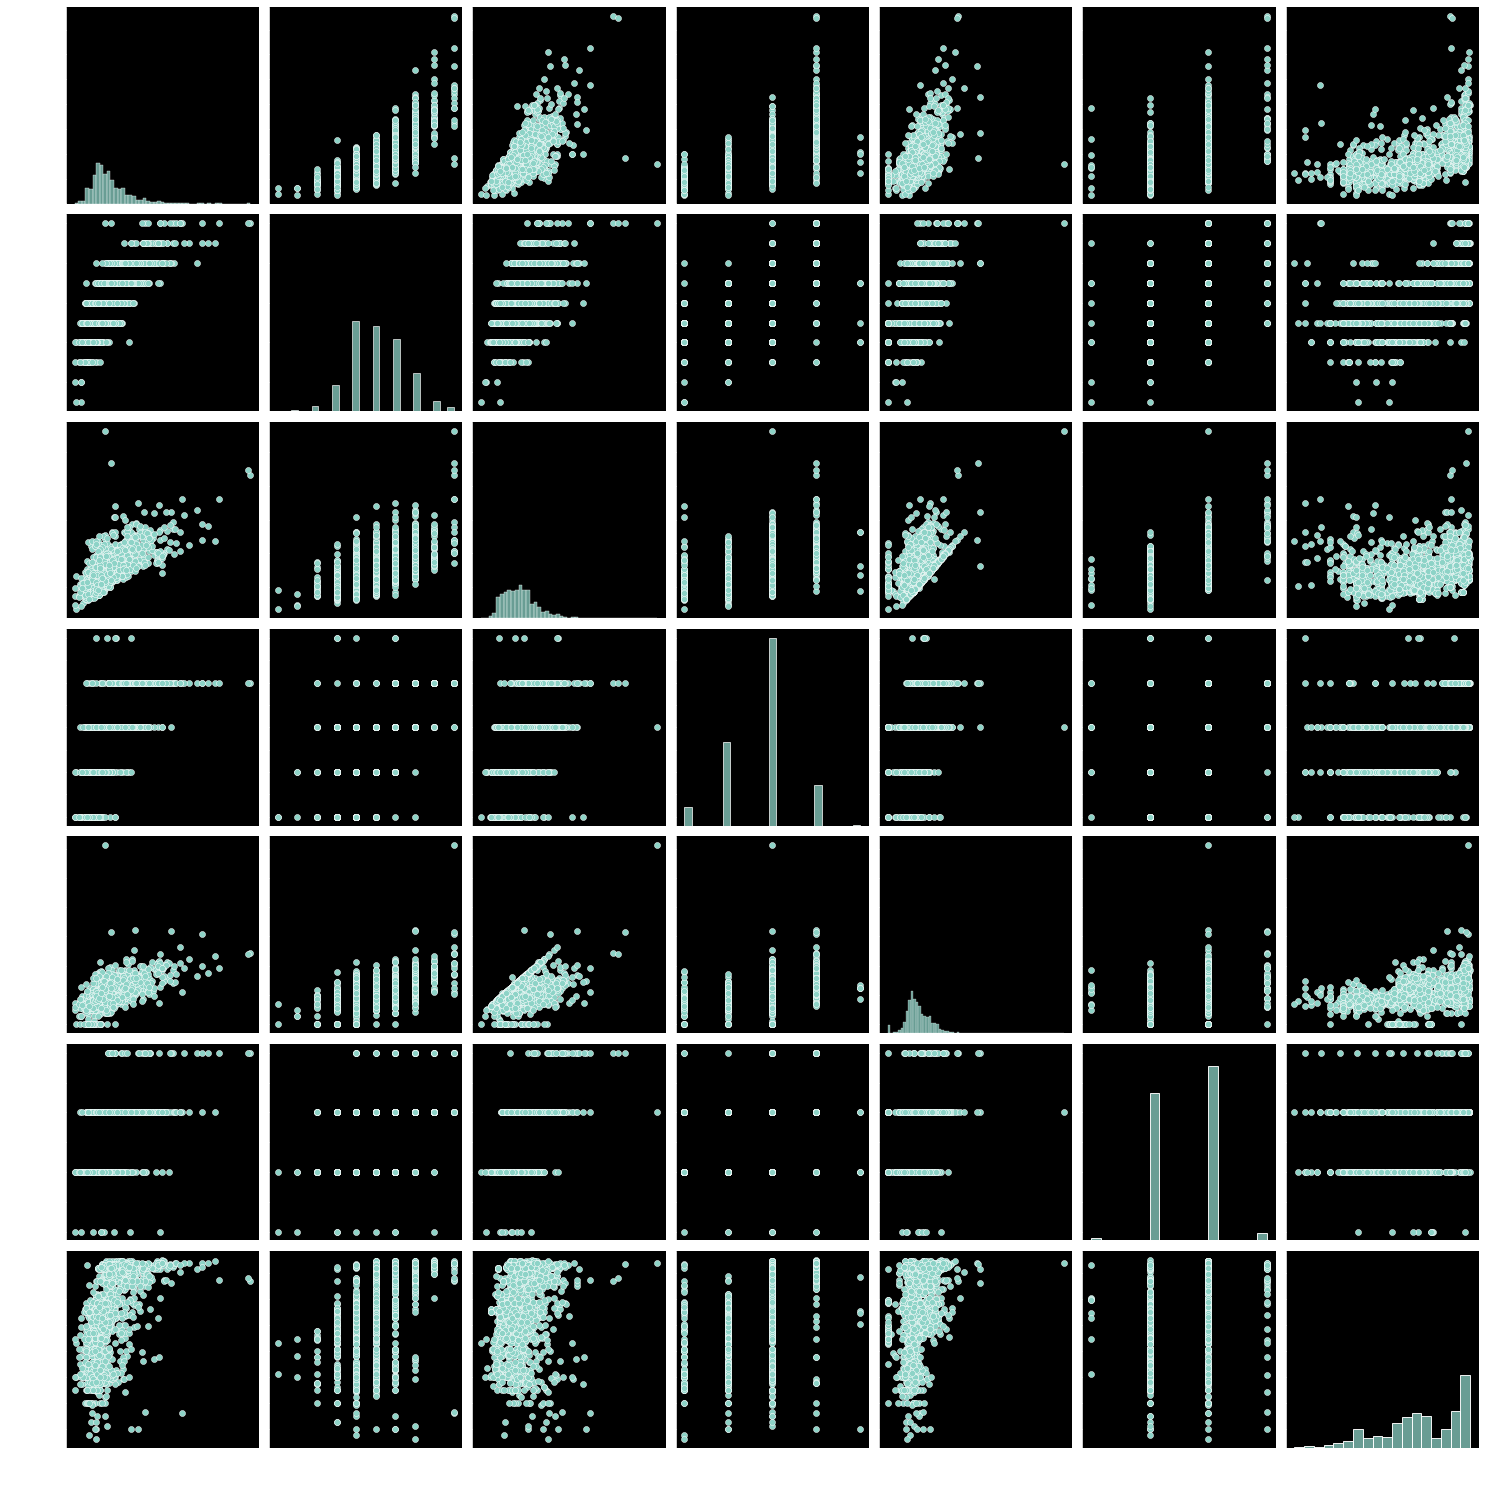

In [36]:
plt.figure(figsize=(15, 20))
sns.pairplot(df_train[cols], height=3)
plt.show()

<h3>Missing Values</h3>

In [37]:
df_train.shape

(1460, 77)

In [38]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (total/1460)*100

missing = pd.concat([total, percent], axis=1, keys=['total', 'missing_percent'])
missing.head(20)

,total,missing_percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data

In [39]:
garage_null_cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
garage_null = df_train[df_train['GarageType'].isnull()][garage_null_cols ]
garage_null.head()

,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN


In [40]:
df_train = df_train.drop(missing[missing['total'] > 1].index, axis=1)
df_train.shape

(1460, 60)

In [41]:
df_train = df_train.drop(df_train[df_train['Electrical'].isnull()].index, axis=0)
df_train.shape

(1459, 60)

<h3>Outlayers</h3>

<h4>Univariate analysis</h4>

In [42]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].values.reshape(-1, 1))

In [43]:
np.mean(saleprice_scaled) #after standard scaling the mean is close to 0

3.896053383194518e-17

In [44]:
np.std(saleprice_scaled) #after scaling the standard deviation is 1

1.0

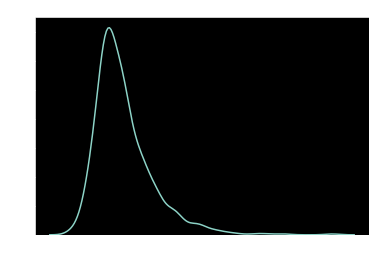

In [45]:
sns.kdeplot(df_train['SalePrice'])
plt.show()

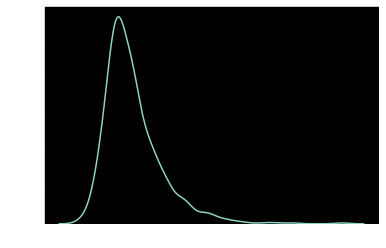

In [46]:
sns.kdeplot(saleprice_scaled.flatten())
plt.show()

<p>Although data has become stadardized it is not totally normalized to normalize the data we can do this</p>

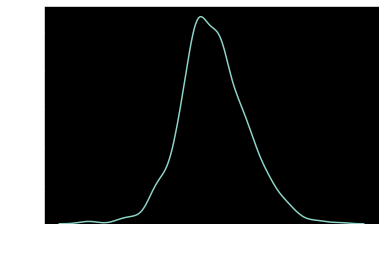

In [47]:
sns.kdeplot(df_train['SalePrice'].apply(lambda x: np.log(x)))
plt.show()

<p>Nomalizing does not make the mean 0 or standard deviation 1</p>

In [48]:
norm_sale = df_train['SalePrice'].apply(lambda x: np.log(x))
norm_sale.corr(df_train['GrLivArea'])

0.7009413894900469

In [49]:
saleprice_scaled[:, 0].argsort()[:3] # returns the indices of the values from lowest value to highest 

array([495, 916, 968], dtype=int64)

In [50]:
saleprice_scaled[495]

array([-1.83820775])

In [51]:
low_range = saleprice_scaled[saleprice_scaled.flatten().argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled.flatten().argsort()[-10:]]
low_range

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

<p>The values are pretty close to 0 in lower end of the distribution</p>

In [52]:
high_range

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

<p>The values are between 0 to 7 in lower end of the distribution. But here two 7 looks like outlayers</p>

<h4>Bivariate analysis</h4>

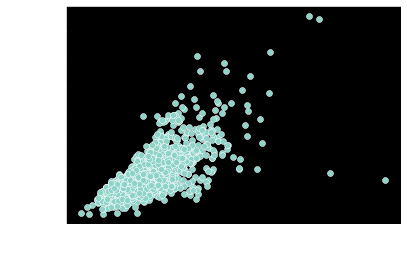

In [53]:
var = 'GrLivArea'

sns.scatterplot(x=var, y='SalePrice', data=df_train)
plt.show()

<p>Here it is very clear that the two values in the right lower side corner are clearly outlayers. So we will remove them and although the two SalePrice Value above 700K(the previous 2 7 value which we though to be outlayers) looks like outliers since they follow the linear trend we will keep them</p> 

In [54]:
df_train.shape

(1459, 60)

In [55]:
ind_to_remove = df_train['GrLivArea'].sort_values(ascending=False)[:2].index

df_train.drop(ind_to_remove, axis=0, inplace=True)

In [56]:
df_train.shape

(1457, 60)

In [57]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','FullBath', 
       'YearBuilt']

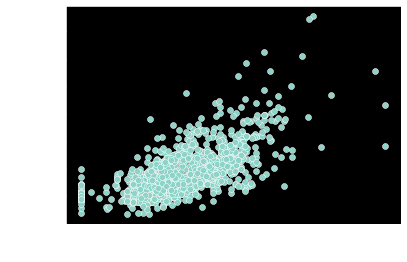

In [58]:
var = 'TotalBsmtSF'

sns.scatterplot(x=var, y='SalePrice', data=df_train)
plt.show()

<p>We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.</p>

<h3>5. Getting HardCore</h3>

In Ayn Rand's novel, 'Atlas Shrugged', there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is 'SalePrice'?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

<b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis

<b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

<b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

<b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.


<h4>Searching for Normality</h4>

In [59]:
df_train1 = df_train.copy()

F:\anaconda-env\tensor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


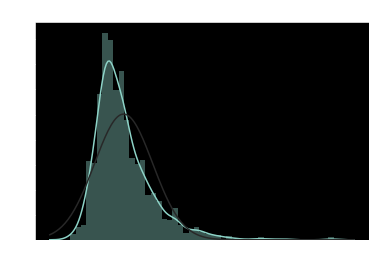

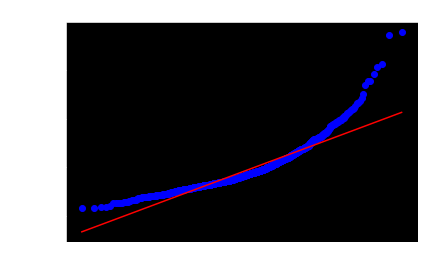

In [60]:
var = 'SalePrice'

sns.distplot(df_train1[var], fit=norm)
plt.title('Hist plot with kernel density(real density) and ideal density')

fig = plt.figure()

res = stats.probplot(df_train1[var], plot=plt)

plt.tight_layout()
plt.show()

In [61]:
def get_zscores(series):
    
    values = series.values
    mean = np.mean(values)
    std = np.std(values)
    
    return (values - mean) / std


zscores = get_zscores(df_train1[var])
zscores[:5]

array([ 0.34666473,  0.00701763,  0.53535756, -0.51503254,  0.86871489])

<p>Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.</p>

In [62]:
# normalizing the saleprice

df_train1['SalePrice'] = np.log(df_train1['SalePrice'])

<p>After normalizing the Salerprice the data is much more normally distributed</p>

F:\anaconda-env\tensor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


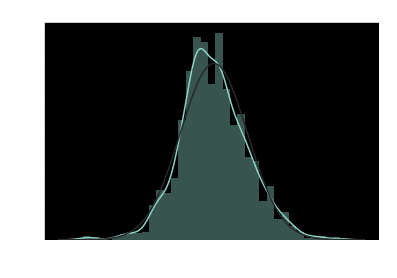

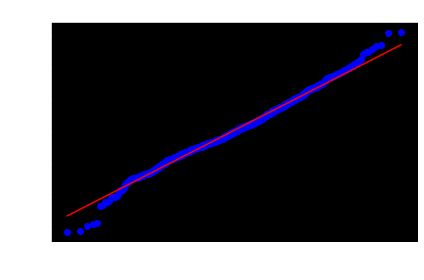

In [63]:
var = 'SalePrice'

sns.distplot(df_train1[var], fit=norm)
plt.title('Hist plot with kernel density(real density) and ideal density')

fig = plt.figure()

res = stats.probplot(df_train1[var], plot=plt)

plt.tight_layout()
plt.show()

<p>For feature GrLivArea</p>

F:\anaconda-env\tensor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


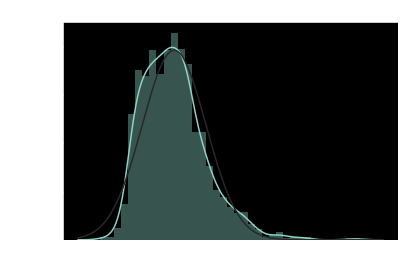

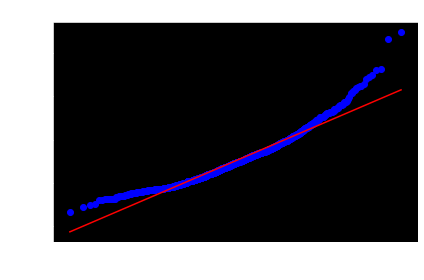

In [64]:
var = 'GrLivArea'

sns.distplot(df_train1[var], fit=norm)
plt.title('Hist plot with kernel density(real density) and ideal density')

fig = plt.figure()

res = stats.probplot(df_train1[var], plot=plt)

plt.tight_layout()
plt.show()

In [65]:
df_train1[var].describe()

count    1457.000000
mean     1510.545642
std       508.043712
min       334.000000
25%      1128.000000
50%      1464.000000
75%      1776.000000
max      4476.000000
Name: GrLivArea, dtype: float64

<p>After log transformation</p>

In [66]:
df_train1['GrLivArea'] = np.log(df_train1['GrLivArea'])

F:\anaconda-env\tensor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


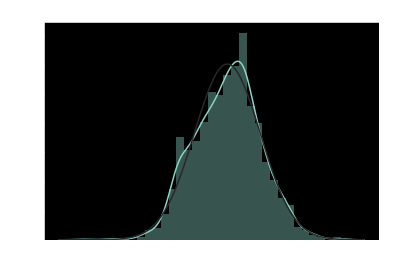

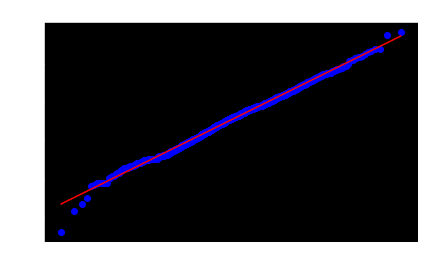

In [67]:
var = 'GrLivArea'

sns.distplot(df_train1[var], fit=norm)
plt.title('Hist plot with kernel density(real density) and ideal density')

fig = plt.figure()

res = stats.probplot(df_train1[var], plot=plt)

plt.tight_layout()
plt.show()


In [68]:
df_train1['GrLivArea'].corr(df_train1['SalePrice'])

0.7374296008996014

<p>As you can see after removing outlayers and normalizing the two columns(features) our correlation has increased to 0.7374 where the previous score was 0.71(check corr_mat heatmap). Now lets do the same for all the other features</p>

F:\anaconda-env\tensor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


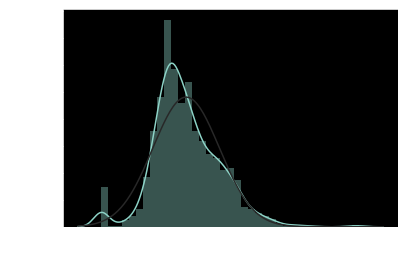

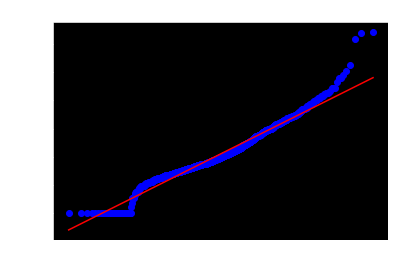

In [69]:
#histogram and normal probability plot for TotalBsmtSF
var = 'TotalBsmtSF'
sns.distplot(df_train1[var], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1[var], plot=plt)

plt.show()

Ok, now we are dealing with the big boss. What do we have here?
<ul>
    <li>Something that, in general, presents skewness.</li>
    <li>A significant number of observations with value zero (houses without basement).</li>
    <li>A big problem because the value zero doesn't allow us to do log transformations.</li>
</ul>

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [70]:
df_train1['TotalBsmtSF'].describe()

count    1457.000000
mean     1052.995882
std       414.754657
min         0.000000
25%       796.000000
50%       991.000000
75%      1297.000000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

In [71]:
df_train1[df_train1['TotalBsmtSF'] == 0].shape

(37, 60)

<p>There are 37 houses which did not have any Basement which is a lot(2.5%) considering that the dataset has only 1400 some records. They are definetly not oulayers as it is very much possible in real world and they usally have low values</p>

<p>Written by me which is not working for some reason</p>

In [72]:
# df_train1['HasBsmt'] = pd.Series(len(df_train1['TotalBsmtSF']), index=df_train1.index)
# df_train1['HasBsmt'] = 0

In [73]:
# df_train1.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [74]:
# var = 'TotalBsmtSF'
# sns.distplot(df_train1[df_train1[var] > 0][var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_train1[df_train1[var] > 0][var], plot=plt)

# plt.show()

In [75]:
# d = pd.DataFrame([[1, 2], [3, 4]], columns=['a', 'b'])
# d

In [76]:
# d.loc[[0], 'a'] = d['a'] + 15

In [77]:
# d

In [78]:
# df_train1[df_train1['TotalBsmtSF'] > 0]['TotalBsmtSF'] = np.log(df_train1[df_train1['TotalBsmtSF'] > 0]['TotalBsmtSF'])

In [79]:
# var = 'TotalBsmtSF'
# sns.distplot(df_train1[df_train1[var] > 0][var], fit=norm);
# fig = plt.figure()
# res = stats.probplot(df_train1[df_train1[var] > 0][var], plot=plt)

# plt.show()

<p>Finished</p>

<p>Copy and Paste which is not working either</p>

F:\anaconda-env\tensor\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
F:\anaconda-env\tensor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


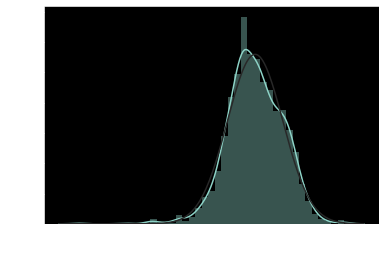

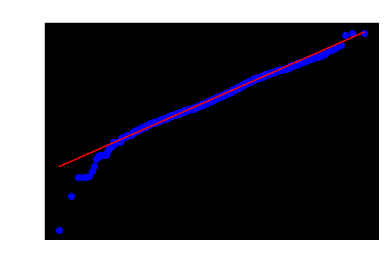

In [80]:
df_train1['HasBsmt'] = pd.Series(len(df_train1['TotalBsmtSF']), index=df_train1.index)
df_train1['HasBsmt'] = 0 
df_train1.loc[df_train1['TotalBsmtSF']>0,'HasBsmt'] = 1
#transform data
df_train1.loc[df_train1['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train1['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df_train1[df_train1['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train1[df_train1['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

<p>finished</p>

In [81]:
df_train['TotalBsmtSF'].corr(df_train['SalePrice'])

0.6515532840624882

In [82]:
df_train1['TotalBsmtSF'].corr(df_train1['SalePrice'])

0.37355160483456

In [83]:
df_train1['HasBsmt'].corr(df_train1['SalePrice'])

0.199626636150875

<h4>homoscedasticity</h4>

<h5>For GrLiveArea</h5>

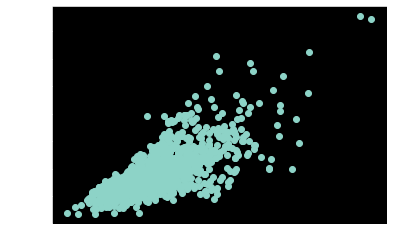

In [84]:
# before normalizing
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

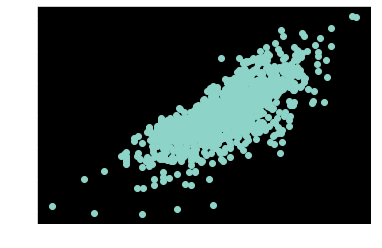

In [85]:
# after normalizing
plt.scatter(df_train1['GrLivArea'], df_train1['SalePrice'])

<p>You can see that after normalizing the data our values has become much more homoscedasticity meaning if we draw a best fit linear line the error between each true value and predicted value wil be constant. But before hetaroscendasticity the error was not that much constant</p>

<h5>For TotalBsmtSF </h5>

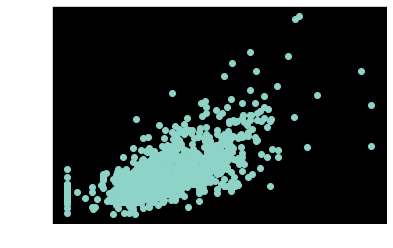

In [86]:
# before normalizing
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])

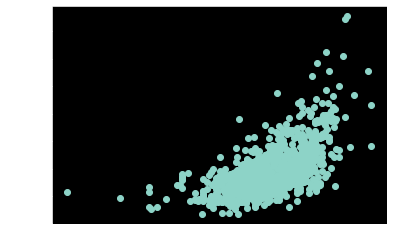

In [87]:
var = 'TotalBsmtSF'
plt.scatter(df_train1[df_train[var] > 0][var], df_train[df_train[var] > 0]['SalePrice'])

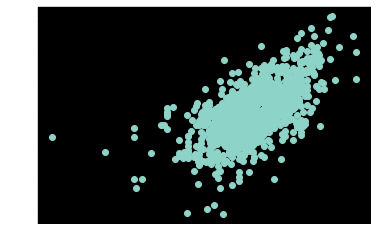

In [88]:
# after normalizing
var = 'TotalBsmtSF'
plt.scatter(df_train1[df_train1[var] > 0][var], df_train1[df_train1[var] > 0]['SalePrice'])

In [89]:
from scipy import stats

In [90]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
            0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,
           0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan =  [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
            0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

l = []

l.append(tillamook)
l.append(newport)
l.append(petersburg)
l.append(magadan)
l.append(tvarminne)

In [91]:
stats.f_oneway(*l)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [92]:
stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [93]:
import numpy as np

In [94]:
# `f_oneway` accepts multidimensional input arrays.  When the inputs
# are multidimensional and `axis` is not given, the test is performed
# along the first axis of the input arrays.  For the following data, the
# test is performed three times, once for each column.

a = np.array([[9.87, 9.03, 6.81],
              [7.18, 8.35, 7.00],              
              [7.45, 6.33, 9.35],
               [6.41, 7.10, 9.33],
              [8.00, 8.24, 8.44]])
b = np.array([[6.35, 7.30, 7.16],
              [6.65, 6.68, 7.63],
               [5.72, 7.73, 6.72],
               [7.01, 9.19, 7.41],
               [7.75, 7.87, 8.30],
               [6.90, 7.97, 6.97]])
c = np.array([[3.31, 8.77, 1.01],
              [8.25, 3.24, 3.62],
              [6.32, 8.81, 5.19],
               [7.48, 8.83, 8.91],
              [8.59, 6.01, 6.07],
              [3.07, 9.72, 7.48]])
F, p = stats.f_oneway(a, b, c) 
F

array([1.29974029, 0.03942841, 3.47699728])

In [95]:
a1 = a[0]
b1 = b[1]
c1 = c[2]
stats.f_oneway(a1, b1, c1)

F_onewayResult(statistic=1.389431345946349, pvalue=0.3192559367778557)

In [96]:
a1 = a[0]
a2 = a[1]
a3 = a[2]
a4 = a[3]
a5 = a[4]

stats.f_oneway(a1, a2, a3, a4, a5)

F_onewayResult(statistic=0.3982695253998034, pvalue=0.8056423308662134)

In [97]:
stats.f_oneway(*a)

F_onewayResult(statistic=0.3982695253998034, pvalue=0.8056423308662134)